# ML510-Assignment 6: Resampling Methods

## Kevin Egedy

Dataset needed:
UCI Diabetes Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 101)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline
np.random.seed(1)

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split,KFold

data = pd.read_csv('../data/diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3> Q.1. Make an 80/20 train/test split</h3>

In [2]:
# TODO -> DONE
y = data['Outcome']
X = data.drop(['Outcome'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h3>Q.2. Fit a logistic regression model on the training data</h3>

In [3]:
from sklearn import linear_model
# sklearn.linear_model.LogisticRegression(
#                                         penalty='l2', *, dual=False, tol=0.0001, C=1.0, 
#                                         fit_intercept=True, intercept_scaling=1, class_weight=None, 
#                                         random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', 
#                                         verbose=0, warm_start=False, n_jobs=None, l1_ratio=None
# )
# TODO -> DONE
regr = linear_model.LogisticRegression(max_iter=200)
regr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h3> Q.3. Predict the test data</h3>

In [4]:
# TODO -> DONE
y_pred = regr.predict(X_test)

<h3> Q.4. Plot the ROC curve and compute the AUC score</h3>

AUC: 0.7313131313131312


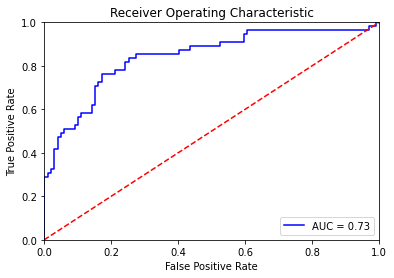

In [5]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = regr.predict_proba(X_test)
preds = probs[:,1]

# TODO -> DONE
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

# TODO -> DONE
roc_auc = roc_auc_score(y_test,y_pred)


print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

<h3> Q.5. Calculate the accuracy metric of the observations in the test set</h3>

In [6]:
# TODO -> DONE
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

print(f'Accuracy: {round(accuracy_score(y_test,y_pred),4)}')
#mean_squared_error(y_test,y_pred)

Accuracy: 0.7792


## Cross-Validation

## *k-*Fold Cross-Validation

<h3> Q.6. In few sentences, explain how K-fold procedure work<h3>

In [7]:
# Explain here
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

# K-fold is the process of splitting the dataset into k consecutive folds.
# Each fold is used once as a validation while the k - 1 remaining folds form the training set.
# This practice is useful in preventing overfitting of the data and allows the model to use all of the data.

<h3> Q.7. Perform logistic regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.
</h3>

<AxesSubplot:xlabel='k-folds'>

,k-folds,mean
0,2,0.758958
1,3,0.762171
2,4,0.765491
3,5,0.770359
4,6,0.772003
5,7,0.767036
6,8,0.765401
7,9,0.768684
8,10,0.773612


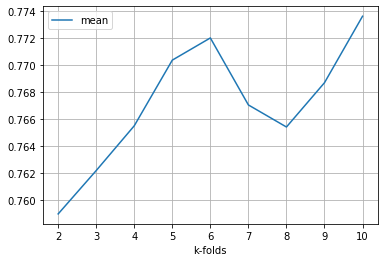

In [8]:
from sklearn.model_selection import cross_val_score

# TODO -> DONE
scores = []
for k in range(2,11):
    kfold = KFold(n_splits=k)
    scores.append( cross_val_score(regr,X_train,y_train,cv=kfold) )

df = pd.DataFrame(data=scores)
summary = pd.DataFrame(columns=['k-folds'],index=df.index)
summary['k-folds'] = np.arange(2,11)
summary['mean'] = df.apply(lambda row: row.mean(),axis=1)
summary.plot(x='k-folds',y='mean',grid=True);
summary

## The Bootstrap

<h3> Q.8.Print the target class distribution (You can see that there's almost twice as much 0s than 1s)
</h3>

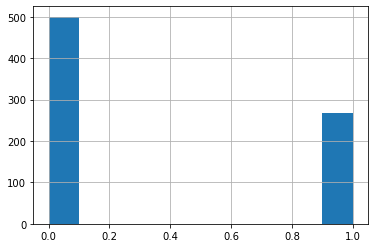

In [9]:
# TODO -> DONE
plt.figure()
counts, bins = np.histogram(data.Outcome)
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show();

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [10]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
from sklearn.utils import resample

# Separate majority and minority classes
# TODO -> DONE
majority_class = data.loc[data['Outcome']==0]
# TODO -> DONE
minority_class = data.loc[data['Outcome']==1]
 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,                     # sample with replacement
                                 n_samples= len(majority_class),   # to match majority class
                                 random_state=42)                  # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
print(f'Length of data: {len(data)}; Length of data_upsampled: {len(data_upsampled)}')

Length of data: 768; Length of data_upsampled: 1000


<h3> Q.9. Display new class counts</h3>

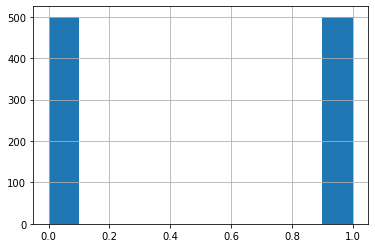

In [12]:
#TODO: the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1

plt.figure()
counts, bins = np.histogram(data_upsampled.Outcome)
plt.hist(bins[:-1], bins, weights=counts)
plt.grid(True)
plt.show();

<h3> Q.10. Let's train another model using Logistic Regression, this time on the balanced dataset</h3>

In [13]:
# Separate input features (X) and target variable (y)
y = data_upsampled['Outcome']
X = data_upsampled.drop(['Outcome'],axis=1)


#Perform train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
regr = linear_model.LogisticRegression(max_iter=200)
regr.fit(X_train,y_train)
 
# Predict on training set
y_pred = regr.predict(X_test)

# How's our accuracy? Has it improved? Comment
print(f'Accuracy: {round(accuracy_score(y_test,y_pred),4)}')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy: 0.67


<AxesSubplot:xlabel='k-folds'>

,k-folds,mean_resampled,mean
0,2,0.758958,0.737500
1,3,0.762171,0.727498
2,4,0.765491,0.735000
3,5,0.770359,0.743750
4,6,0.772003,0.737497
5,7,0.767036,0.735001
6,8,0.765401,0.738750
7,9,0.768684,0.731217
8,10,0.773612,0.737500


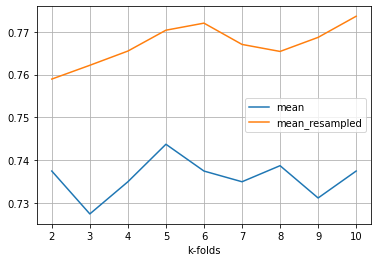

In [14]:
scores = []
for k in range(2,11):
    kfold = KFold(n_splits=k)
    scores.append( cross_val_score(regr,X_train,y_train,cv=kfold) )

df = pd.DataFrame(data=scores)
summary2 = pd.DataFrame(columns=['k-folds'],index=df.index)
summary2['k-folds'] = np.arange(2,11)
summary2['mean'] = df.apply(lambda row: row.mean(),axis=1)
summary = summary.join(summary2['mean'],lsuffix='_resampled')
summary.plot(x='k-folds',y=['mean','mean_resampled'],grid=True);
summary

In [15]:
# Comments:

# Calculating the accuracy on a single validation set, it appears the resampled data performs poorly.
# However, after performing cross validation with K-folds, it is clear that the resampled data has a greater 
# accuracy at any number of folds.

<h3> Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [17]:
# Enter summary here

# I greatly enjoyed this week. The tradeoffs between sampling methods were very valuable! 
# I was only aware of K-fold validation. I look forward to using LOOCV and bootstrap in future work.
# Personally, I want to dive into bootstrap further. I would like to know the limits to oversampling
# such that the data information ins't changed.